## KNN Use Case Model

## *when to use knn model 

### when the dataset has less dimensionality means no of features are very less

## *when not to use knn model

## 1) dimensionality very large, 2) low latency application - the application where calculations or processing need to be done faster

## #######################################################################

## Project Sales Prediction Of Product

## Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Loading of Dataset

In [2]:
df=pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
df.shape

(400, 5)

In [5]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [7]:
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

C:\Users\NIKHIL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


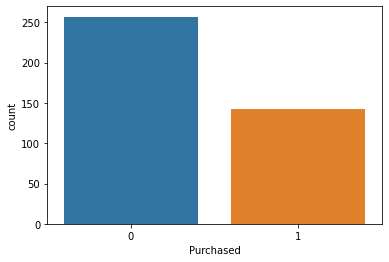

In [8]:
sns.countplot(df['Purchased'])
plt.show()

## Defining the X and Y

In [9]:
x=df.iloc[:,2:4]
x.shape

(400, 2)

In [10]:
y=df.iloc[:,-1]
y.shape

(400,)


## upsampling the target variable

In [11]:
from sklearn.utils import resample



In [12]:
mic=df[df['Purchased']==1]
mac=df[df['Purchased']==0]


In [13]:
print(mic.shape,mac.shape)

(143, 5) (257, 5)


In [14]:
mic_upsampled=resample(mic, replace=True, n_samples=257, random_state=123)


In [15]:
df_upsampled=pd.concat([mac,mic_upsampled])

In [16]:
df_upsampled['Purchased'].value_counts()

0    257
1    257
Name: Purchased, dtype: int64

## Splitting The Data Into Training and Testing

In [17]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [18]:
x_train

,Age,EstimatedSalary
93,29,28000
23,45,22000
299,46,117000
13,32,18000
90,22,81000
...,...,...
255,52,90000
72,20,23000
396,51,23000
235,46,79000


## before standardization

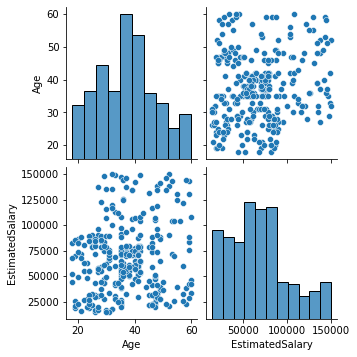

In [19]:
sns.pairplot(data=x_train)

## As we are calculating the eucledian distance between the two data point in knn we need to standardize the data for the x or independent variables

In [20]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()


In [21]:
x_train_scalar=scalar.fit_transform(x_train)


x_train_scalar


array([[-0.80330081, -1.19121795],
       [ 0.75697997, -1.36859801],
       [ 0.85449752,  1.43991958],
       [-0.51074816, -1.48685138],
       [-1.48592365,  0.37563923],
       [-1.19337101,  0.55301929],
       [ 1.04953262, -1.04340124],
       [-0.21819552, -0.30431766],
       [ 0.95201507, -1.33903467],
       [-1.09585346, -1.07296458],
       [-0.51074816,  1.97205975],
       [ 2.21974321, -1.0138379 ],
       [ 1.43960282, -1.39816136],
       [ 0.07435713, -0.39300769],
       [-1.19337101,  0.64170932],
       [ 2.02470811, -0.89558452],
       [ 1.14705017,  0.58258263],
       [-0.02316042,  0.2869492 ],
       [-0.21819552,  0.25738586],
       [-0.31571307, -0.74776781],
       [-1.68095875, -0.57038775],
       [ 0.85449752,  0.58258263],
       [-0.60826571, -1.0138379 ],
       [ 0.95201507, -1.13209127],
       [-0.21819552, -0.54082441],
       [ 0.17187468,  0.81908937],
       [-0.41323061,  1.32166621],
       [ 1.14705017,  0.52345594],
       [ 0.75697997,

In [22]:
x_train_scalar=pd.DataFrame(x_train_scalar,columns=x_train.columns)
x_train_scalar


,Age,EstimatedSalary
0,-0.803301,-1.191218
1,0.756980,-1.368598
2,0.854498,1.439920
3,-0.510748,-1.486851
4,-1.485924,0.375639
...,...,...
315,1.439603,0.641709
316,-1.680959,-1.339035
317,1.342085,-1.339035
318,0.854498,0.316513


In [23]:
x_test_scalar=scalar.fit_transform(x_test)
x_test_scalar

array([[-0.29863069, -1.23842019],
       [-0.02918947, -0.42323911],
       [-0.29863069,  1.23623667],
       [-0.02918947,  1.35269111],
       [-1.19676812,  1.23623667],
       [-0.11900321, -0.30678467],
       [-1.73565058, -1.15107936],
       [ 0.86894796,  0.39194198],
       [-0.74769941, -1.67512435],
       [ 0.77913422,  1.90584971],
       [-0.47825818, -0.1029894 ],
       [-0.02918947, -0.07387579],
       [-0.38844444, -0.1029894 ],
       [ 0.77913422,  1.61471361],
       [ 1.22820293,  0.18814671],
       [ 1.49764416,  1.67294083],
       [ 1.85689913,  0.21726032],
       [-1.10695438, -0.51057994],
       [-1.01714064,  0.33371476],
       [ 1.85689913,  0.77041891],
       [ 0.06062428, -0.01564857],
       [ 0.9587617 ,  0.36282837],
       [ 0.41987925,  1.84762249],
       [ 0.68932047, -0.94728409],
       [ 0.50969299, -1.44221547],
       [-1.19676812, -1.76246518],
       [ 1.67727164, -0.83082965],
       [ 0.86894796, -0.04476218],
       [ 1.22820293,

In [24]:
x_test_scalar=pd.DataFrame(x_test_scalar,columns=x_test.columns)
x_test_scalar

,Age,EstimatedSalary
0,-0.298631,-1.238420
1,-0.029189,-0.423239
2,-0.298631,1.236237
3,-0.029189,1.352691
4,-1.196768,1.236237
...,...,...
75,1.318017,0.945101
76,-0.568072,-0.714375
77,-1.196768,-1.733352
78,-0.837513,0.333715


In [25]:
np.round(x_train_scalar.describe(),1)

,Age,EstimatedSalary
count,320.0,320.0
mean,0.0,-0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.7
50%,-0.0,-0.1
75%,0.8,0.5
max,2.2,2.4


## After Scalarization

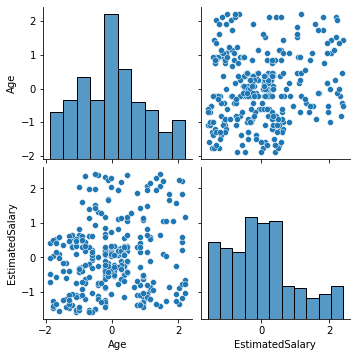

In [26]:



sns.pairplot(data=x_train_scalar)

## The Data plotting Is the Same As Compared To Before Standardization ,but in this case the Data is Distributed Normally where Mean=0 , S.D=1

In [27]:
####################################################################

## ML Model K-NN

In [28]:
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

model1 = KNeighborsClassifier(n_neighbors=3)

model1.fit(x_train_scalar,y_train)

y_pred1=model1.predict(x_test_scalar)

print(classification_report(y_test,y_pred1))



              precision    recall  f1-score   support

           0       0.89      0.83      0.86        48
           1       0.77      0.84      0.81        32

    accuracy                           0.84        80
   macro avg       0.83      0.84      0.83        80
weighted avg       0.84      0.84      0.84        80



## Test Accuracy Without Tunning HyperParameter

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred1)

0.8375

In [30]:
y_test.shape

(80,)

In [31]:
y_pred1.shape

(80,)

## Tunning Of HyperParameter

## Using K-Fold Cross Validation

In [32]:
from sklearn.model_selection import cross_val_score

In [37]:
# creating odd list of K for KNN
myList = list(range(0,50))
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty dict that will hold cv scores
cv_scores = {}

# perform CV = 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x, y, cv=10, scoring='accuracy')
    cv_scores[k] = scores.mean()

print(cv_scores)
print("Optimal K value:")

optimal_k = max(cv_scores, key=cv_scores.get)
print(optimal_k)

{1: 0.8025, 3: 0.79, 5: 0.7849999999999999, 7: 0.7949999999999999, 9: 0.7875, 11: 0.78, 13: 0.7899999999999999, 15: 0.77, 17: 0.7625, 19: 0.77, 21: 0.7700000000000001, 23: 0.7700000000000001, 25: 0.7825000000000001, 27: 0.785, 29: 0.77, 31: 0.7675000000000001, 33: 0.7725000000000001, 35: 0.7775000000000001, 37: 0.775, 39: 0.77, 41: 0.7725, 43: 0.775, 45: 0.775, 47: 0.775, 49: 0.775}
Optimal K value:
1


## Retraining with the optimal value of K received using k-fold cross validation and calculating test accuracy

In [40]:
# Retrain the model with tuned hyperparmeter Koptimal (Koptimal = K where accuracy is max in CV) 
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(x_train_scalar,y_train)
y_pred = knn.predict(x_test_scalar)
acc = accuracy_score(y_test, y_pred, normalize=True) * float(100)
print('\n****Test accuracy for k = 1 is %d%%' % (acc))

#  Predicted class from KNN




****Test accuracy for k = 1 is 85%


In [42]:
# Get text corresponding to vectors
# print(actual_class)

model_predicted_on_test_data = pd.DataFrame()
model_predicted_on_test_data['age'] = x_test.iloc[:,0]
model_predicted_on_test_data['estimated salary'] = x_test.iloc[:,-1]
model_predicted_on_test_data['actualclass'] = y_test
model_predicted_on_test_data['Predicted Class'] = y_pred

model_predicted_on_test_data.to_csv(r"KNN_Predicted_Class.csv",index=False)
model_predicted_on_test_data.head(5)

,age,estimated salary,actualclass,Predicted Class
398,36,33000,0,0
125,39,61000,0,0
328,36,118000,1,1
339,39,122000,1,0
172,26,118000,0,1


In [36]:
## dataset from kaggle :https://www.kaggle.com/code/himanshuusa/sales-prediction-using-social-media-ads/notebook